# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Scraping mandiri pada situs https://www.rumah123.com/jual/makassar/rumah/

2. **Isi Dataset**:

* Data harga rumah yang ada di kota makassar yang ditawarkan oleh web rumah123.com. termasuk data harga, gambar rumah, lokasi dll

3. **Fitur Dataset**:

* Title: judl dari iklan yang ditawarkan
* Lokasi: lokasi rumah (makassar)
* Jumlah Kamar Tidur: jumlah kamar tidur dalam bilangan bulat
* Jumlah Kamar Mandi: jumlah kamar mandi dalam bilangan bulat
* Luas Tanah: luas tanah dalam satuan meter kuadrat
* Luas Bangunan: luas bangunan dalam satuan meter kuadrat
* Carport: tempat parkir kendaraan
* Price: harga yang ditawarkan
* Timestamp: waktu saat scraping data



# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [3]:
import os, shutil
from google.colab import files
import zipfile
import random
from random import sample
import shutil
from shutil import copyfile
import pathlib
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [4]:
df = pd.read_csv('housePrice_makassar_from_rumah123.csv')
df.head()

,Title,Lokasi,Jumlah Kamar Tidur,Jumlah Kamar Mandi,Luas Tanah,Luas Bangunan,Car Port,Price,Timestamp
0,Dekat Sekolah,Makassar,4,6,451,385,2,15000000000,2025-05-15 14:01:07.354294
1,Dekat Tempat Ibadah,Makassar,5,5,425,368,2,10300000000,2025-05-15 14:01:07.354657
2,Dekat Sekolah,Makassar,4,3,180,219,1,3130000000,2025-05-15 14:01:07.355030
3,Siap Huni,Makassar,4,3,92,72,2,988000000,2025-05-15 14:01:07.355410
4,Dekat Akses Transportasi,Makassar,3,2,82,72,2,1430000000,2025-05-15 14:01:07.355772


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               689 non-null    object
 1   Lokasi              689 non-null    object
 2   Jumlah Kamar Tidur  689 non-null    int64 
 3   Jumlah Kamar Mandi  689 non-null    int64 
 4   Luas Tanah          689 non-null    int64 
 5   Luas Bangunan       689 non-null    int64 
 6   Car Port            689 non-null    int64 
 7   Price               689 non-null    int64 
 8   Timestamp           689 non-null    object
dtypes: int64(6), object(3)
memory usage: 48.6+ KB


In [6]:
df.isnull().sum()

,0
Title,0
Lokasi,0
Jumlah Kamar Tidur,0
Jumlah Kamar Mandi,0
Luas Tanah,0
Luas Bangunan,0
Car Port,0
Price,0
Timestamp,0


In [7]:
df.describe()

,Jumlah Kamar Tidur,Jumlah Kamar Mandi,Luas Tanah,Luas Bangunan,Car Port,Price
count,689.000000,689.000000,689.000000,689.000000,689.000000,6.890000e+02
mean,4.150943,3.161103,240.251089,222.892598,0.937591,3.285353e+09
std,8.531091,5.548821,1071.994160,670.876072,0.847634,6.685606e+09
min,1.000000,1.000000,8.000000,15.000000,0.000000,1.700000e+03
25%,3.000000,2.000000,82.000000,72.000000,0.000000,9.000000e+08
50%,3.000000,3.000000,120.000000,120.000000,1.000000,1.550000e+09
75%,4.000000,4.000000,196.000000,203.000000,2.000000,3.150000e+09
max,200.000000,100.000000,22000.000000,13000.000000,6.000000,8.300000e+10


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df[df.Price == df.Price.min()]

,Title,Lokasi,Jumlah Kamar Tidur,Jumlah Kamar Mandi,Luas Tanah,Luas Bangunan,Car Port,Price,Timestamp
686,Siap Huni,Makassar,3,2,98,77,1,1700,2025-05-15 14:02:38.291156


In [10]:
df[df['Luas Tanah'] == df['Luas Tanah'].max()]

,Title,Lokasi,Jumlah Kamar Tidur,Jumlah Kamar Mandi,Luas Tanah,Luas Bangunan,Car Port,Price,Timestamp
370,Subsidi,Makassar,200,100,22000,10000,0,83000000000,2025-05-15 14:01:56.409373


In [11]:
df[df['Luas Bangunan'] == df['Luas Bangunan'].max()]

,Title,Lokasi,Jumlah Kamar Tidur,Jumlah Kamar Mandi,Luas Tanah,Luas Bangunan,Car Port,Price,Timestamp
157,"Rumah 2 Lantai, Citraland Celebes Makassar, SH...",Makassar,3,3,16200,13000,2,3150000000,2025-05-15 14:01:26.082342


In [12]:
df[df['Jumlah Kamar Mandi'] == df['Jumlah Kamar Mandi'].max()]

,Title,Lokasi,Jumlah Kamar Tidur,Jumlah Kamar Mandi,Luas Tanah,Luas Bangunan,Car Port,Price,Timestamp
370,Subsidi,Makassar,200,100,22000,10000,0,83000000000,2025-05-15 14:01:56.409373


In [13]:
df[df['Jumlah Kamar Tidur'] == df['Jumlah Kamar Tidur'].max()]

,Title,Lokasi,Jumlah Kamar Tidur,Jumlah Kamar Mandi,Luas Tanah,Luas Bangunan,Car Port,Price,Timestamp
370,Subsidi,Makassar,200,100,22000,10000,0,83000000000,2025-05-15 14:01:56.409373


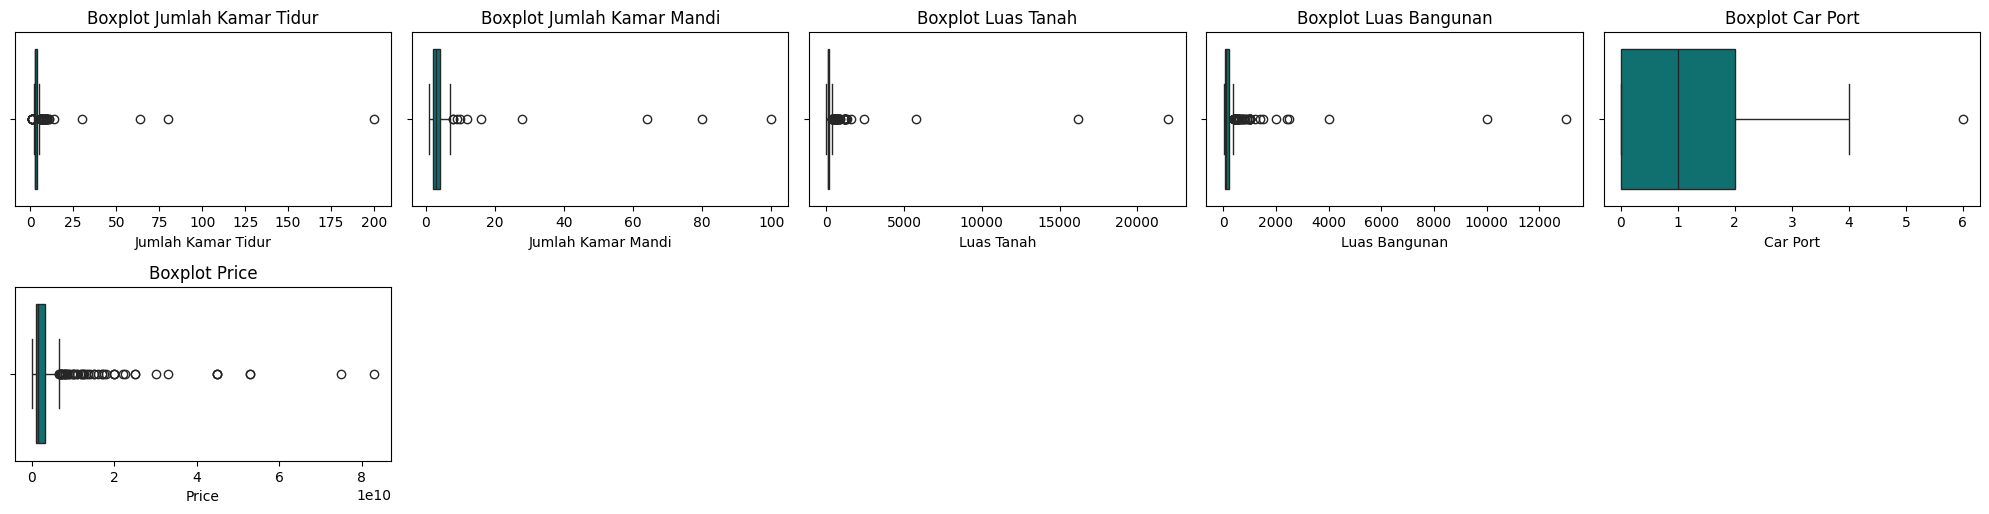

In [14]:
# Mengecek ouliers

numeric_cols = df.select_dtypes(include=np.number)
plt.figure(figsize=(20, 15))

for i, (label, data) in enumerate(numeric_cols.items(), 1):
    plt.subplot(6, 5, i)
    sns.boxplot(x=data, color='teal')
    plt.title(f"Boxplot {label}")
    plt.xlabel(label)

plt.tight_layout()
plt.show()

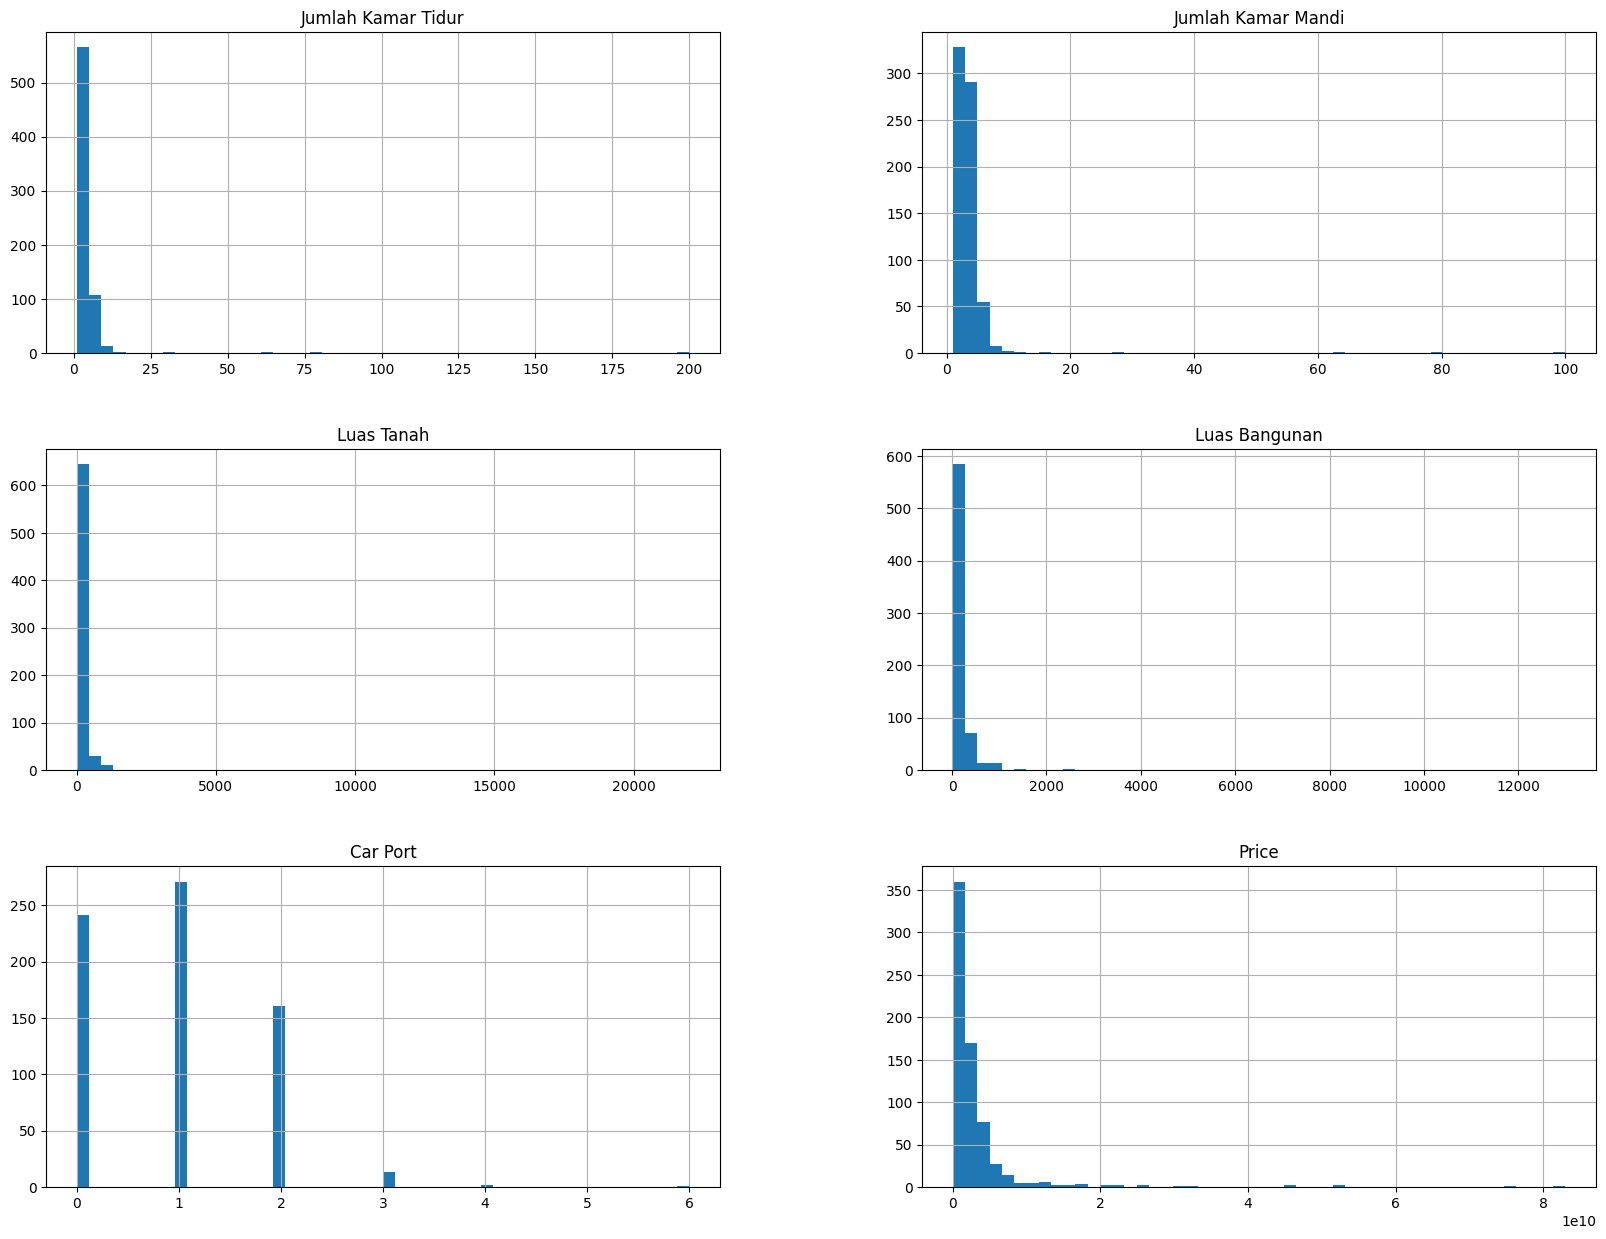

In [15]:
# Menghitung histogram
df.hist(bins=50, figsize=(20, 15))
plt.show()

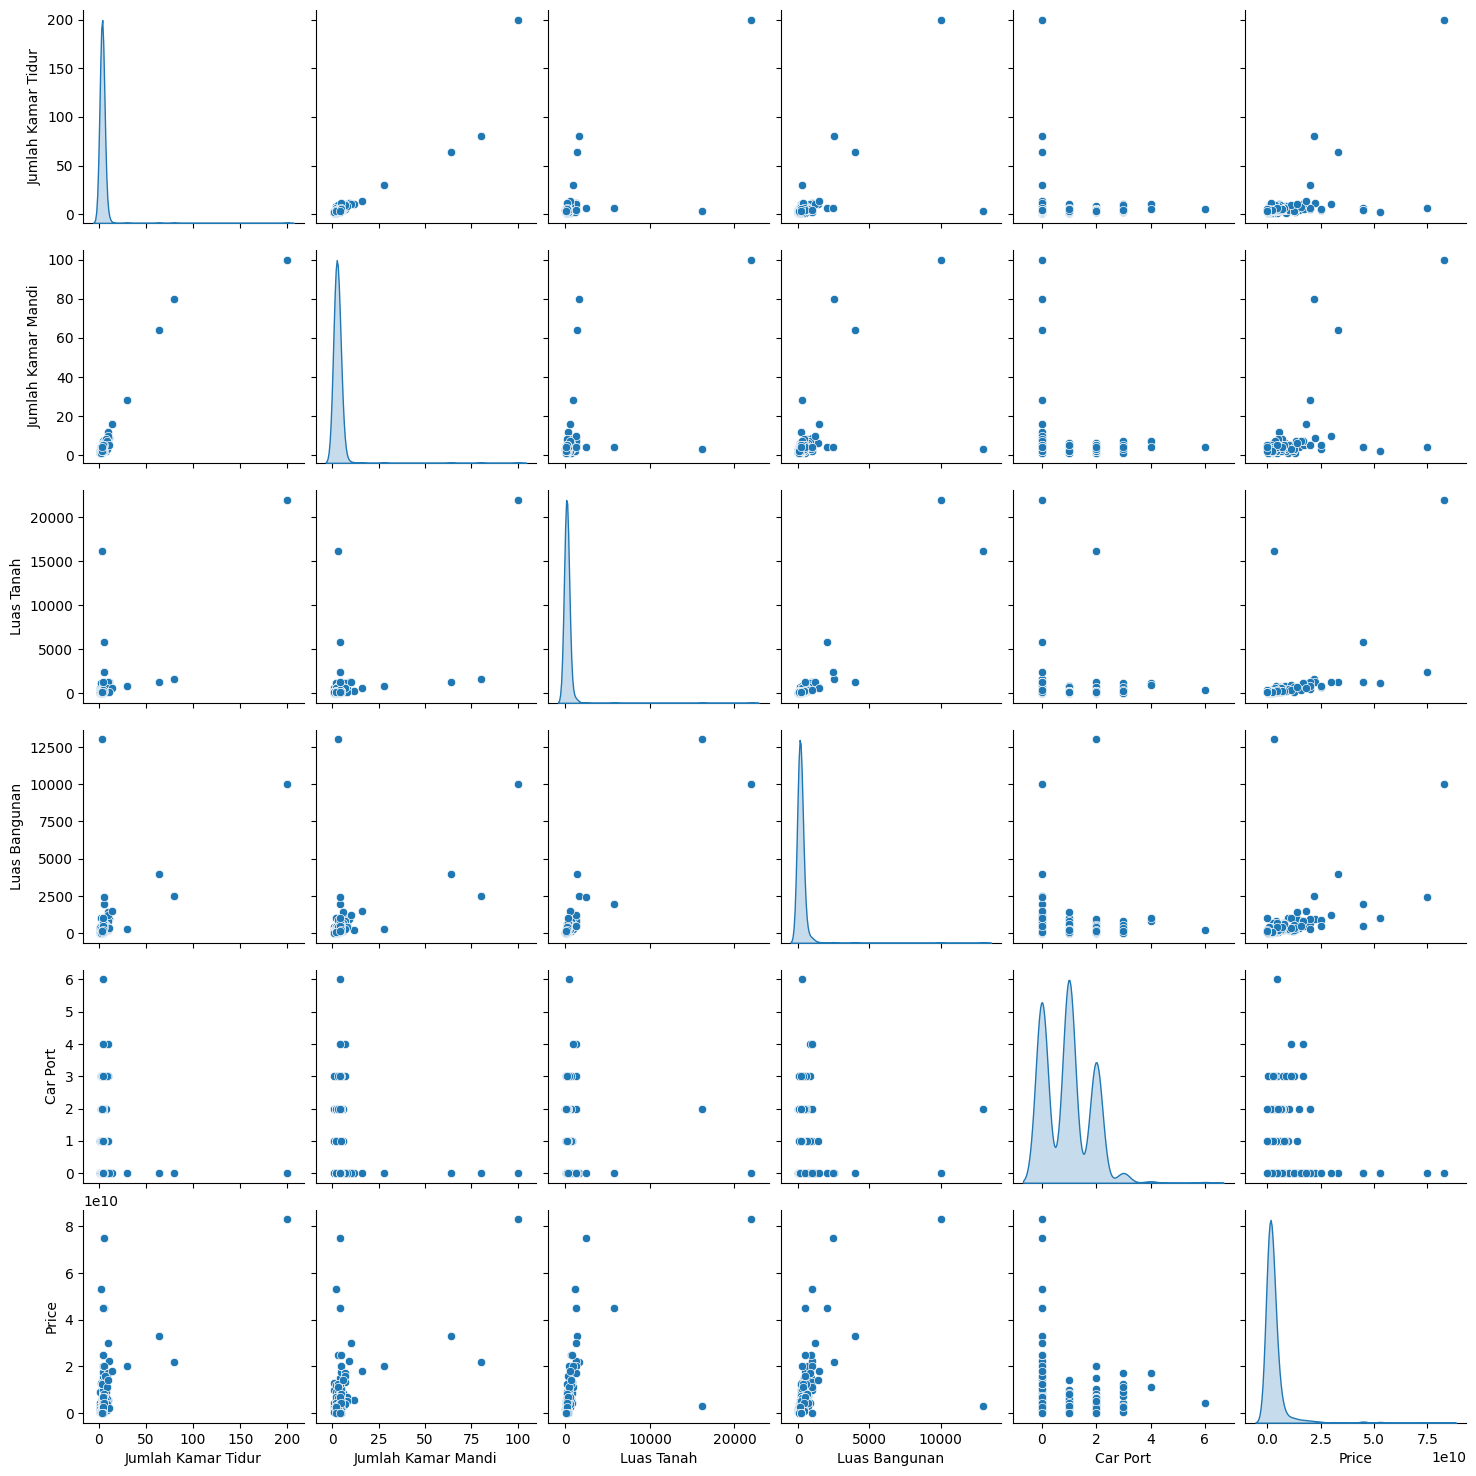

In [16]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind='kde')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik')

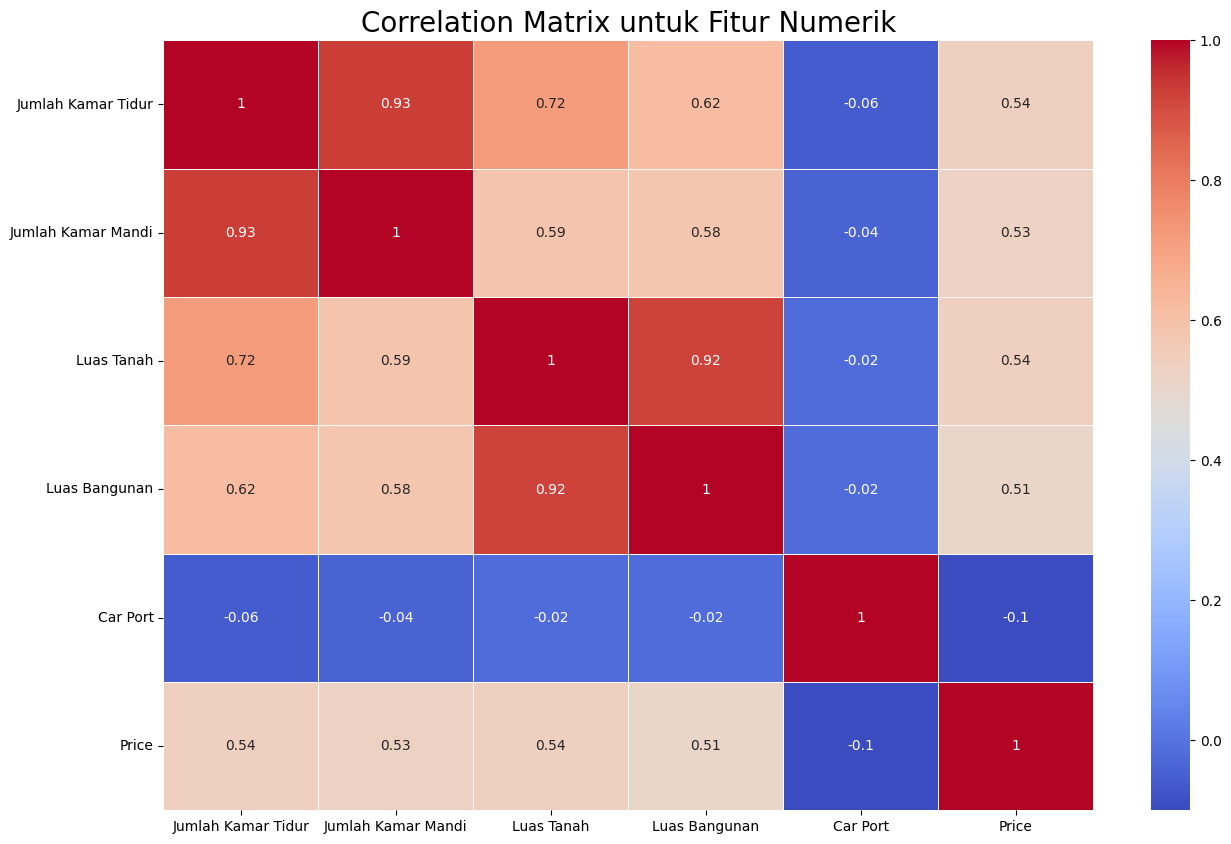

In [17]:
# mengevaluasi skor korelasi

plt.figure(figsize=(15, 10))
correlation_matrix = df[numeric_cols.columns].corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix untuk Fitur Numerik", size=20)

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [18]:
# Ambil hanya kolom numerikal
numeric_cols = df.select_dtypes(include='number').columns
# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
# Terapkan filter ke dataset asli (termasuk kolom non-numerikal)
df = df[filter_outliers]
# Cek ukuran dataset setelah outlier dihapus
df.shape

(573, 9)

In [19]:
df.describe()

,Jumlah Kamar Tidur,Jumlah Kamar Mandi,Luas Tanah,Luas Bangunan,Car Port,Price
count,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,3.308901,2.511344,121.450262,122.045375,0.987784,1.785203e+09
std,0.900975,1.083229,57.431197,68.725521,0.776529,1.264438e+09
min,2.000000,1.000000,8.000000,15.000000,0.000000,1.700000e+03
25%,3.000000,2.000000,78.000000,70.000000,0.000000,8.000000e+08
50%,3.000000,2.000000,105.000000,100.000000,1.000000,1.300000e+09
75%,4.000000,3.000000,151.000000,164.000000,2.000000,2.500000e+09
max,5.000000,6.000000,327.000000,385.000000,3.000000,6.500000e+09


In [20]:
# Hitung rata-rata Price
mean_price = df['Price'].mean()

# Dapatkan indeks dari baris dengan nilai Price minimum
min_price_index = df[df['Price'] == df['Price'].min()].index[0]

# Imputasi nilai Price terendah dengan rata-rata
df.loc[min_price_index, 'Price'] = mean_price

/tmp/ipython-input-2416128944.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1785203493.366492' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[min_price_index, 'Price'] = mean_price


In [21]:
df.describe()

,Jumlah Kamar Tidur,Jumlah Kamar Mandi,Luas Tanah,Luas Bangunan,Car Port,Price
count,573.000000,573.000000,573.000000,573.000000,573.000000,5.730000e+02
mean,3.308901,2.511344,121.450262,122.045375,0.987784,1.788319e+09
std,0.900975,1.083229,57.431197,68.725521,0.776529,1.262229e+09
min,2.000000,1.000000,8.000000,15.000000,0.000000,1.200000e+06
25%,3.000000,2.000000,78.000000,70.000000,0.000000,8.070000e+08
50%,3.000000,2.000000,105.000000,100.000000,1.000000,1.300000e+09
75%,4.000000,3.000000,151.000000,164.000000,2.000000,2.500000e+09
max,5.000000,6.000000,327.000000,385.000000,3.000000,6.500000e+09


In [22]:
drop_cols = ['Price', 'Timestamp', 'Title', 'Lokasi',]
X = df.drop(drop_cols, axis=1)
y = df['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Standarisasi
from sklearn.preprocessing import StandardScaler

numerical_features = ['Jumlah Kamar Tidur', 'Jumlah Kamar Mandi', 'Luas Bangunan', 'Luas Tanah', 'Car Port']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,Jumlah Kamar Tidur,Jumlah Kamar Mandi,Luas Bangunan,Luas Tanah,Car Port
215,0.794859,-0.456566,-0.027911,0.899013,-1.245267
78,-0.318430,0.460571,0.559141,-0.036497,-1.245267
184,-0.318430,-0.456566,-0.908488,-0.954356,0.039265
75,-0.318430,-0.456566,-0.027911,-0.283613,-1.245267
20,1.908147,-0.456566,0.324320,0.404781,-1.245267


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 573 entries, 2 to 688
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               573 non-null    object 
 1   Lokasi              573 non-null    object 
 2   Jumlah Kamar Tidur  573 non-null    int64  
 3   Jumlah Kamar Mandi  573 non-null    int64  
 4   Luas Tanah          573 non-null    int64  
 5   Luas Bangunan       573 non-null    int64  
 6   Car Port            573 non-null    int64  
 7   Price               573 non-null    float64
 8   Timestamp           573 non-null    object 
dtypes: float64(1), int64(5), object(3)
memory usage: 60.9+ KB


In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((458, 5), (115, 5), (458,), (115,))